## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  

In [155]:
import pandas as pd
#5 A
div2008 = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?CIVILSTAND=F&Tid=2008K1&OMR%C3%85DE=000&K%C3%98N=TOT", sep=";")
div2008res = div2008.iloc[0,4]

div2020 = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?CIVILSTAND=F&Tid=2020K3&OMR%C3%85DE=000&K%C3%98N=TOT", sep = ";")
div2020res = div2020.iloc[0,4]
onePro = (div2008res/100)
changeInDiv = (div2020res/onePro)
res = changeInDiv-100
print("Procent change in divorce from 2008 to 2020 gone up with: " + str(res) + "%")

Procent change in divorce from 2008 to 2020 gone up with: 28.412503730786426%


In [153]:
#5 B

BigData = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?CIVILSTAND=TOT&Tid=2020K3&K%C3%98N=TOT&OMR%C3%85DE=*", sep=";")
sortList = BigData.sort_values(by=["INDHOLD"], ascending=False)
nList = sortList[sortList[:]["OMRÅDE"] != ("Hele landet")]
Cities = nList[nList.OMRÅDE.str.contains("Region")==False]

fiveBig = []
for i in range(5):
    fiveBig.append([Cities.iloc[i,3], Cities.iloc[i,4]])

    
unmarried = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?CIVILSTAND=U&Tid=2020K3&K%C3%98N=TOT&OMR%C3%85DE=*", sep=";")
b = fiveBig[0]

b2 = fiveBig[1]
a =unmarried[unmarried[:]["OMRÅDE"] == (b[0])]
resultProcent=0
resultcity = ""
for i in fiveBig:
    city = i
    a =int(unmarried[unmarried[:]["OMRÅDE"] == (city[0])]["INDHOLD"])
    procent =  city[1]/100
    procentForCity = (a/procent) 
    if procentForCity > resultProcent:
        resultProcent = procentForCity
        resultcity=city[0]
        
print("The city with the highest procent is " + resultcity + " and the procent is: " + str(x))


The city with the highest procent is København and the procent is: 65.43366480526353


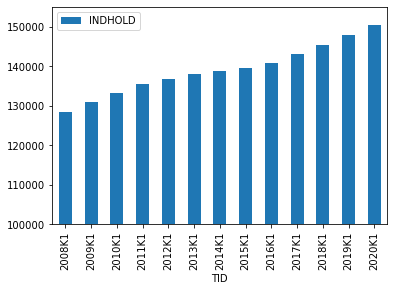

In [167]:
#C
married = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?CIVILSTAND=G&OMR%C3%85DE=101&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1", sep=";")


import matplotlib.pyplot as plt
%matplotlib inline

married.plot(kind="bar", x='TID', y='INDHOLD')
plt.ylim(100000,155000)
plt.show()


(0.0, 100.0)

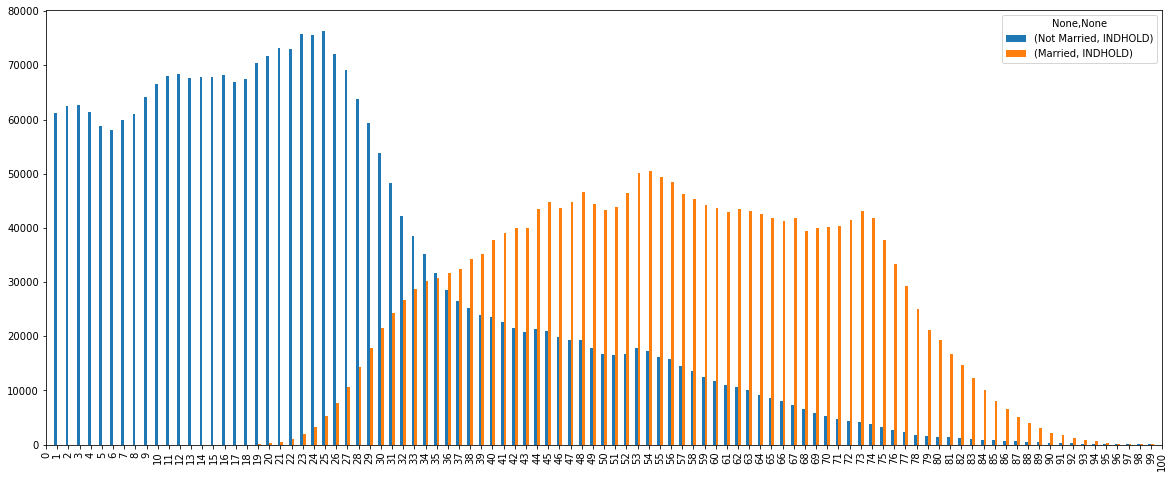

In [190]:
#D
MAN = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?CIVILSTAND=G%2CU&Tid=2020K3&ALDER=*", sep=";")
gift =  MAN[(MAN[:]['CIVILSTAND'].str.contains("Gift")) & (MAN[:]['ALDER'] != 'I alt')].reset_index(drop=True)
ugift =  MAN[(MAN[:]['CIVILSTAND'].str.contains("Ugift")) & (MAN[:]['ALDER'] != 'I alt')].reset_index(drop=True)

data = pd.concat([ugift, gift], axis=1, keys=['Not Married','Married'])
data.plot(kind="bar", figsize=(20,8))
plt.xlim(0,100)